In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename, logger_func
from ieee_train import eval_train, eval_check_feature
from kaggle_utils import reduce_mem_usage, move_feature
logger = logger_func()

2019-09-27 08:15:11,452 func.utils 347 [INFO]    [logger_func] start 


In [2]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMN_GROUP = 'DT-M'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET, COLUMN_GROUP, 'is_train', 'date']

def filter_feature(path):
    if path.count(''):
        return True
    else:
        return False

# paths_train = glob('../submit/lb9516/*_train.gz')
# paths_test  = glob('../submit/lb9516/*_test.gz')
# paths_train = glob('../feature/raw_use/is*_train.gz')
# paths_test  = glob('../feature/raw_use/is*_test.gz')
# paths_train += glob('../feature/raw_use/TransactionID_train.gz')
# paths_test  += glob('../feature/raw_use/TransactionID_test.gz')
# paths_train = glob('../submit/sub_valid/*_train.gz')
# paths_test  = glob('../submit/sub_valid/*_test.gz')
paths_train = glob('../submit/re_sub/*_train.gz')
paths_test  = glob('../submit/re_sub/*_test.gz')
paths_train += glob('../submit/add_feature/*_train.gz')
paths_test  += glob('../submit/add_feature/*_test.gz')
# paths_train += glob('../feature/valid_use/531*_train.gz')
# paths_test  += glob('../feature/valid_use/531*_test.gz')
# paths_train += glob('../feature/valid_use/532*_train.gz')
# paths_test  += glob('../feature/valid_use/532*_test.gz')
paths_train += glob('../feature/valid_use/533*uid2*_train.gz')
paths_test  += glob('../feature/valid_use/533*uid2*_test.gz')
paths_train += glob('../feature/valid_use/533*uid3*_train.gz')
paths_test  += glob('../feature/valid_use/533*uid3*_test.gz')
paths_train += glob('../feature/valid_use/534*_train.gz')
paths_test  += glob('../feature/valid_use/534*_test.gz')
paths_train += glob('../feature/valid_use/535*_train.gz')
paths_test  += glob('../feature/valid_use/535*_test.gz')
paths_train += glob('../feature/valid_use/536*_train.gz')
paths_test  += glob('../feature/valid_use/536*_test.gz')
paths_train += glob('../feature/valid_use/703*_train.gz')
paths_test  += glob('../feature/valid_use/703*_test.gz')
paths_train += glob('../feature/valid_use/704*_train.gz')
paths_test  += glob('../feature/valid_use/704*_test.gz')

print(len(paths_train))

# paths_train += glob('../feature/valid_trush/528*uid2*_train.gz')
# paths_test  += glob('../feature/valid_trush/528*uid2*_test.gz')

# for path in paths_train:
#     if path.count('C14_ratio'):
#         paths_train.remove(path)
        
# for path in paths_test:
#     if path.count('C14_ratio'):
#         paths_test.remove(path)
    
# paths_train = glob('../feature/raw_use/*_train.gz')
# paths_test = glob('../feature/raw_use/*_test.gz')
# paths_train = [path for path in paths_train if filter_feature(path) ]
# paths_test = [path for path in paths_test if filter_feature(path) ]

# paths_train_feature = sorted(glob('../feature/org_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/org_use/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/valid/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/valid/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/kernel/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/kernel/*_test.gz'))

# paths_train_feature = sorted(glob('../feature/valid_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/valid_use/*_test.gz'))
paths_train_feature = []
paths_test_feature  = []

# df_train = reduce_mem_usage( parallel_load_data(paths_train) )
# df_test  = reduce_mem_usage( parallel_load_data(paths_test) )
df_train = parallel_load_data(paths_train)
df_test  = parallel_load_data(paths_test)
Y = df_train[COLUMN_TARGET]
df_train.drop(COLUMN_TARGET, axis=1, inplace=True)

1855


In [3]:
# xdeep = pd.read_csv('../output/pred_result/20190923_1646_ieee__xdeepfm_pred_1041feature_AUC0-870').iloc[:, 1:]
# df_train = df_train.merge(xdeep, how='inner', on=COLUMN_ID)
# df_test = df_test.merge(xdeep, how='inner', on=COLUMN_ID)
# df_user_id_bear = pd.read_csv('../output/same_user_pattern/20190901_user_ids_share.csv').set_index(COLUMN_ID)

# df_train.set_index(COLUMN_ID, inplace=True)
# df_train['user_id_bear'] = df_user_id_bear['predicted_user_id']
# df_train.reset_index(inplace=True)

# df_test.set_index(COLUMN_ID, inplace=True)
# df_test['user_id_bear'] = df_user_id_bear['predicted_user_id']
# df_test.reset_index(inplace=True)

2019-09-27 08:17:24,538 func.utils 111 [INFO]    [<module>] * EXP: dataset new_set (590540, 1854) lr 0.01  


  * Diff Features: 1
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.909839
[400]	valid_0's auc: 0.922691
[600]	valid_0's auc: 0.928788
[800]	valid_0's auc: 0.932112
[1000]	valid_0's auc: 0.933742
[1200]	valid_0's auc: 0.934545
[1400]	valid_0's auc: 0.935017
[1600]	valid_0's auc: 0.935417
[1800]	valid_0's auc: 0.935838
[2000]	valid_0's auc: 0.936109
[2200]	valid_0's auc: 0.936343
Early stopping, best iteration is:
[2182]	valid_0's auc: 0.936422


2019-09-27 08:28:44,819 func.utils 140 [INFO]    [ieee_cv]   * Fold0 2017-12: 0.9364220735061392 | Bear's...PB:0.9848355111973046 PV:0.9817808012518024 All:0.9828569502765544 


[  * Fold0 Validation-DT-M 2017-12: 134339] done in 663 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.939186
[400]	valid_0's auc: 0.949934
[600]	valid_0's auc: 0.954788
[800]	valid_0's auc: 0.957118
[1000]	valid_0's auc: 0.958488
[1200]	valid_0's auc: 0.959114
[1400]	valid_0's auc: 0.959294
[1600]	valid_0's auc: 0.959355
[1800]	valid_0's auc: 0.959409
Early stopping, best iteration is:
[1729]	valid_0's auc: 0.95948


2019-09-27 08:38:15,596 func.utils 140 [INFO]    [ieee_cv]   * Fold1 2018-3: 0.9594797300991609 | Bear's...PB:0.9726138999302877 PV:0.9768470927519656 All:0.9755646611362504 


[  * Fold1 Validation-DT-M 2018-3: 101968] done in 557 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.939044
[400]	valid_0's auc: 0.952774
[600]	valid_0's auc: 0.959156
[800]	valid_0's auc: 0.962245
[1000]	valid_0's auc: 0.964009
[1200]	valid_0's auc: 0.965215
[1400]	valid_0's auc: 0.965761
[1600]	valid_0's auc: 0.966233
[1800]	valid_0's auc: 0.966428
[2000]	valid_0's auc: 0.966578
Early stopping, best iteration is:
[1963]	valid_0's auc: 0.966633


2019-09-27 08:47:40,548 func.utils 140 [INFO]    [ieee_cv]   * Fold2 2018-1: 0.9666334594464251 | Bear's...PB:0.9837868587098131 PV:0.9811365685596903 All:0.9819081076331951 


[  * Fold2 Validation-DT-M 2018-1: 92510] done in 556 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.93405
[400]	valid_0's auc: 0.944802
[600]	valid_0's auc: 0.949041
[800]	valid_0's auc: 0.950853
[1000]	valid_0's auc: 0.952103
[1200]	valid_0's auc: 0.952873
[1400]	valid_0's auc: 0.953379
[1600]	valid_0's auc: 0.953753
[1800]	valid_0's auc: 0.953803
[2000]	valid_0's auc: 0.953985
Early stopping, best iteration is:
[1997]	valid_0's auc: 0.953995


2019-09-27 08:57:00,224 func.utils 140 [INFO]    [ieee_cv]   * Fold3 2018-5: 0.9539945220384455 | Bear's...PB:0.9545290980282245 PV:0.9494279529451389 All:0.9517951385186183 


[  * Fold3 Validation-DT-M 2018-5: 92427] done in 552 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.949115
[400]	valid_0's auc: 0.95936
[600]	valid_0's auc: 0.96326
[800]	valid_0's auc: 0.964811
[1000]	valid_0's auc: 0.965439
[1200]	valid_0's auc: 0.965965
[1400]	valid_0's auc: 0.9662
[1600]	valid_0's auc: 0.966486
Early stopping, best iteration is:
[1639]	valid_0's auc: 0.966558


2019-09-27 09:04:43,410 func.utils 140 [INFO]    [ieee_cv]   * Fold4 2018-2: 0.9665575904065717 | Bear's...PB:0.9849388325635694 PV:0.9792512340849528 All:0.9814097933840232 


[  * Fold4 Validation-DT-M 2018-2: 85725] done in 453 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.947569
[400]	valid_0's auc: 0.95946
[600]	valid_0's auc: 0.964638
[800]	valid_0's auc: 0.967094
[1000]	valid_0's auc: 0.968344
[1200]	valid_0's auc: 0.969292
[1400]	valid_0's auc: 0.969584
[1600]	valid_0's auc: 0.969731
Early stopping, best iteration is:
[1593]	valid_0's auc: 0.969757


2019-09-27 09:12:18,097 func.utils 140 [INFO]    [ieee_cv]   * Fold5 2018-4: 0.969757073150164 | Bear's...PB:0.9743964903988322 PV:0.9661345863052532 All:0.9693592067749277 


[  * Fold5 Validation-DT-M 2018-4: 83571] done in 445 s
[  * Make Prediction Result File.] done in 57 s
* Check Corr with Past Submit.
  *  (506691,) (506691,)
  * LB0.9566 / 0.9501817883737803
  *  (506691,) (506691,)
  * LB0.9609 / 0.9735862517596461
  *  (506691,) (506691,)
  * LB0.9566 / 0.001121112637556166
* CV: 0.9588074081078176 | BestIter: 1850.5
* Training Feature Importance


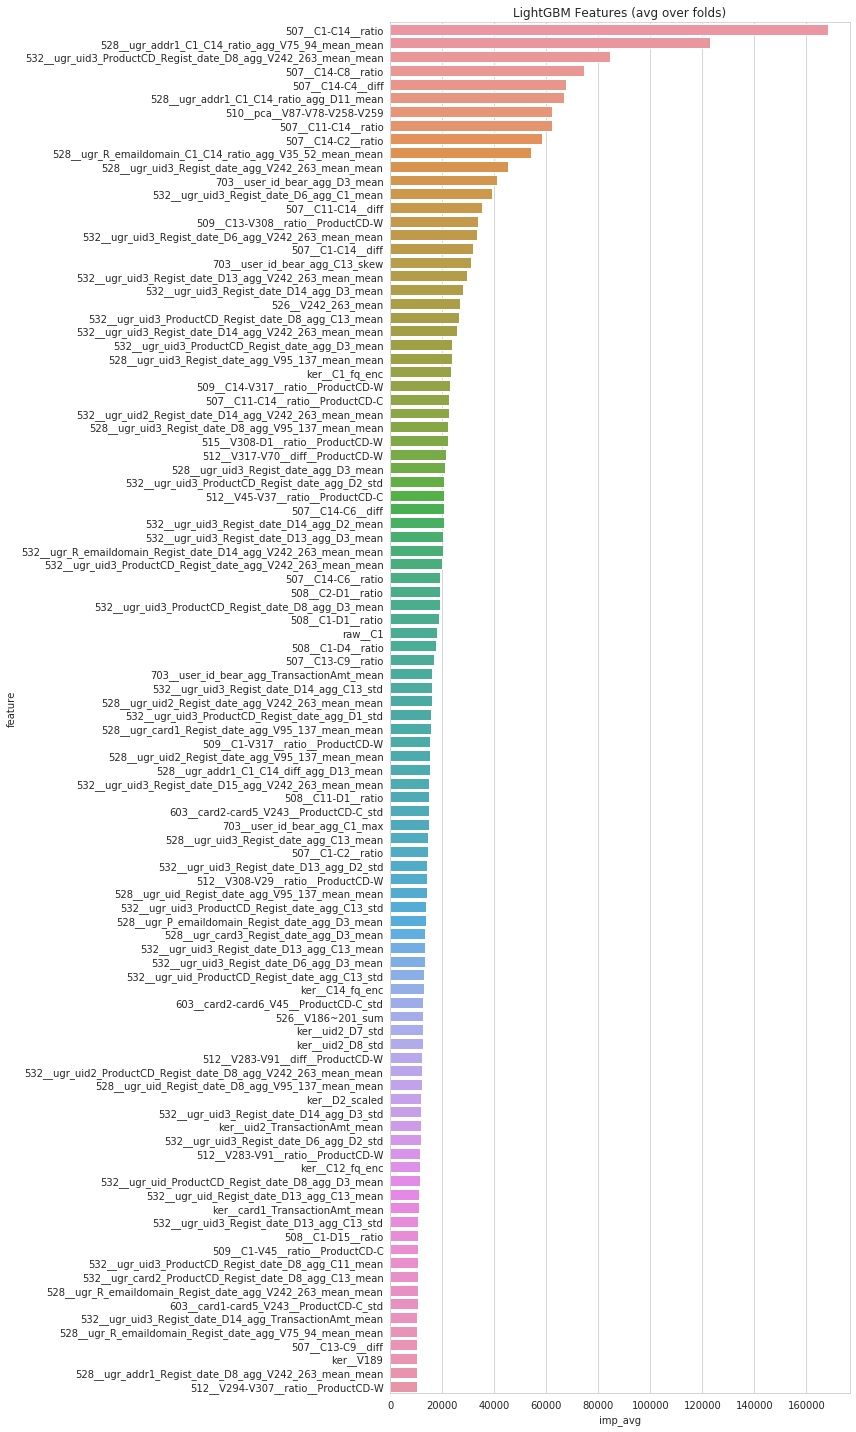

Setup Dataset dim_ml_dataset.


In [4]:
is_submit = [True, False][0]
has_dec = [True, False][0]
n_splits = 6
set_type = 'new_set'

valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

if len(valid_paths_train):
    df_feat_train = parallel_load_data(valid_paths_train)
    df_feat_test  = parallel_load_data(valid_paths_test)
    
    col_drops = eval_check_feature(df_feat_train, df_feat_test)
    
    tmp_train = df_train.join(df_feat_train)
    tmp_test = df_test.join(df_feat_test)
else:
    tmp_train = df_train
    tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# 2017-12抜いてみる
# if not has_dec:
#     tmp_train = tmp_train[tmp_train[COLUMN_GROUP]!='2017-12']
#     Y = Y.loc[tmp_train.index]
#     n_splits = 5


#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 60,
    'n_jobs': 96,
#     'n_jobs': 84,
#     'n_jobs': 48,
#     'n_jobs': 36,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.9,
    'subsample_freq': 1,
    'colsample_bytree' : 0.10,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
#     params['learning_rate'] = 0.05
    params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} {tmp_train.shape} lr {params['learning_rate']} ")

list_result_feim = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)
feim = list_result_feim[0]

In [9]:
feim = list_result_feim[0]
# feim = read_pkl_gzip('../output/feature_importances/20190926_1350__CV0-9604930198337085__feature1942.gz')
# feim = read_pkl_gzip('../output/feature_importances/20190925_1450__CV0-9581588018233685__feature2114.gz')
key1 = '532_'
key2 = '_D'

idx = [col for col in feim.index if
       (
       col.count(key1)
#        and
       or
       col.count(key2)
       )
       and not col.count('ratio')
       and not col.count('diff')
      ]
feim = feim.loc[idx]
feim.sort_values(by='imp_avg', inplace=True, ascending=False)
print(feim.shape)
feim.tail(100)

(242, 7)


,imp_fold1,imp_fold2,imp_fold3,imp_fold4,imp_fold5,imp_fold6,imp_avg
feature,,,,,,,
532__ugr_uid3_Regist_date_D14_agg_D11_mean,6200.466797,6046.814453,5433.631836,5663.675293,6791.582520,5072.408203,5868.096191
528__ugr_card2_Regist_date_agg_D3_mean,5973.717285,5581.044434,6457.999023,4896.027832,6393.134766,5784.496094,5847.736816
ker__D15_DT_D_std_score,5964.152344,7002.783203,5596.659668,5839.444824,5461.995117,5142.687012,5834.620605
ker__uid3_D6_mean,5955.125488,4936.676270,6165.559570,6100.038574,5777.572754,5983.933105,5819.817871
528__ugr_card3_Regist_date_agg_D12_mean,5885.145508,6228.938477,5822.997559,5347.752441,6052.044922,5557.018555,5815.649902
528__ugr_card1_Regist_date_agg_D3_mean,5892.281738,5243.484863,5556.239746,6013.805176,5652.658203,6294.727539,5775.532715
ker__uid4_D2_std,5416.371582,4871.666504,6013.069336,6170.526855,6658.232910,5505.095215,5772.493652
ker__uid4_D4_mean,6177.290527,4655.939941,6164.549805,4980.821777,6526.914551,5413.018066,5653.089355
ker__TransactionAmt_DT_D_std_score,5880.178711,5654.082520,5538.722168,5125.661133,6522.180664,5049.665039,5628.414551


In [10]:
cnt = 0
# feim = read_pkl_gzip('../output/feature_importances/20190909_2324__CV0-9467296784440689__feature552.gz')
for feature_name in feim.index:
# for feature_name in feim.tail(100).index:
# for feature_name in feim[feim['imp_avg']<6000].index:
    
    if not feature_name.count('mean'):
        continue

    if feature_name.count('raw'):
        from_dir = 'raw_use'
        to_dir = 'raw_trush'
#         from_dir = 'raw_trush'
#         to_dir = 'raw_use'
    else:
        from_dir = 'org_use'
        to_dir = 'org_trush'
#         from_dir = 'org_trush'
#         to_dir = 'org_use'
#     from_dir = 'product_feature'
#     from_dir = 'kernel'
#     from_dir = 'check_trush'
#     from_dir = 'raw_trush'
#     from_dir = 'raw_use'
#     from_dir = 'org_trush'
#     from_dir = 'useless'
    from_dir = '../submit/re_sub'
#     from_dir = '../submit/add_feature/'
#     from_dir = 'org_use'
#     from_dir = 'valid_use'
#     from_dir = 'valid_trush'
    to_dir = '../submit/escape'
#     to_dir = '../submit/add_feature'
#     to_dir = '../submit/add_feature'
#     to_dir = 'valid_trush'
#     to_dir = 'valid_use'
#     to_dir = 'raw_trush'
#     to_dir = 'check_trush'
#     to_dir = 'org_use'
#     to_dir = 'useless'
#     to_dir = 'valid'
#     to_dir = 'kernel'
    try:
#         print(feature_name)
        move_feature([feature_name], from_dir, to_dir)
        cnt+=1
    except FileNotFoundError:
        print(feature_name)
print(cnt)

138


2019-09-27 02:21:20,976 func.utils 111 [INFO]    [<module>] * EXP: dataset new_set (590540, 1846) lr 0.01  


  * Diff Features: 1
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.910985
[400]	valid_0's auc: 0.92361
[600]	valid_0's auc: 0.930006
[800]	valid_0's auc: 0.93307
[1000]	valid_0's auc: 0.934471
[1200]	valid_0's auc: 0.935197
[1400]	valid_0's auc: 0.935795
[1600]	valid_0's auc: 0.936472
[1800]	valid_0's auc: 0.937111
[2000]	valid_0's auc: 0.937433
[2200]	valid_0's auc: 0.937538
Early stopping, best iteration is:
[2291]	valid_0's auc: 0.93763


2019-09-27 02:31:26,190 func.utils 140 [INFO]    [ieee_cv]   * Fold0 2017-12: 0.9376302986773978 | Bear's...PB:0.9863010119555884 PV:0.9830600570468268 All:0.984153875147801 


[  * Fold0 Validation-DT-M 2017-12: 134339] done in 594 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.940272
[400]	valid_0's auc: 0.951145
[600]	valid_0's auc: 0.955659
[800]	valid_0's auc: 0.957895
[1000]	valid_0's auc: 0.958822
[1200]	valid_0's auc: 0.959345
Early stopping, best iteration is:
[1137]	valid_0's auc: 0.959403
[  * Fold1 Validation-DT-M 2018-3: 101968] done in 290 s


2019-09-27 02:36:27,159 func.utils 140 [INFO]    [ieee_cv]   * Fold1 2018-3: 0.9594026088414572 | Bear's...PB:0.9736007971184027 PV:0.9756612485045382 All:0.9752492744933525 


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.940465
[400]	valid_0's auc: 0.953639
[600]	valid_0's auc: 0.959909
[800]	valid_0's auc: 0.962652
[1000]	valid_0's auc: 0.964378
[1200]	valid_0's auc: 0.965261
[1400]	valid_0's auc: 0.965815
[1600]	valid_0's auc: 0.966265
[1800]	valid_0's auc: 0.966469
[2000]	valid_0's auc: 0.966578
Early stopping, best iteration is:
[1993]	valid_0's auc: 0.966587


2019-09-27 02:47:54,249 func.utils 140 [INFO]    [ieee_cv]   * Fold2 2018-1: 0.9665871432375057 | Bear's...PB:0.9842357722322047 PV:0.9787162008076371 All:0.9807748283565623 


[  * Fold2 Validation-DT-M 2018-1: 92510] done in 677 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.9353
[400]	valid_0's auc: 0.946019
[600]	valid_0's auc: 0.950128
[800]	valid_0's auc: 0.952439
[1000]	valid_0's auc: 0.953443
[1200]	valid_0's auc: 0.954332
[1400]	valid_0's auc: 0.954761
[1600]	valid_0's auc: 0.95511
Early stopping, best iteration is:
[1678]	valid_0's auc: 0.955173
[  * Fold3 Validation-DT-M 2018-5: 92427] done in 475 s


2019-09-27 02:56:00,239 func.utils 140 [INFO]    [ieee_cv]   * Fold3 2018-5: 0.9551734523975758 | Bear's...PB:0.9535184488018879 PV:0.9491275449164821 All:0.9513591973854263 


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.950695
[400]	valid_0's auc: 0.960147
[600]	valid_0's auc: 0.96389
[800]	valid_0's auc: 0.965507
[1000]	valid_0's auc: 0.966187
[1200]	valid_0's auc: 0.966684
[1400]	valid_0's auc: 0.966895
[1600]	valid_0's auc: 0.967236
[1800]	valid_0's auc: 0.967412
[2000]	valid_0's auc: 0.967538
[2200]	valid_0's auc: 0.967652
[2400]	valid_0's auc: 0.967776
[2600]	valid_0's auc: 0.967899
Early stopping, best iteration is:
[2619]	valid_0's auc: 0.967936


2019-09-27 03:08:50,449 func.utils 140 [INFO]    [ieee_cv]   * Fold4 2018-2: 0.9679364605192085 | Bear's...PB:0.9860789303982148 PV:0.9805620656143761 All:0.9825645343779825 


[  * Fold4 Validation-DT-M 2018-2: 85725] done in 762 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.947758
[400]	valid_0's auc: 0.959797
[600]	valid_0's auc: 0.965351
[800]	valid_0's auc: 0.967889
[1000]	valid_0's auc: 0.968937
[1200]	valid_0's auc: 0.969604
[1400]	valid_0's auc: 0.969905
[1600]	valid_0's auc: 0.970072
[1800]	valid_0's auc: 0.970106
Early stopping, best iteration is:
[1716]	valid_0's auc: 0.970145


2019-09-27 03:17:04,981 func.utils 140 [INFO]    [ieee_cv]   * Fold5 2018-4: 0.9701450588848702 | Bear's...PB:0.9722219912996284 PV:0.9681606959291862 All:0.9697300920774741 


[  * Fold5 Validation-DT-M 2018-4: 83571] done in 484 s
[  * Make Prediction Result File.] done in 67 s
* Check Corr with Past Submit.
  *  (506691,) (506691,)
  * LB0.9566 / 0.9507484959879506
  *  (506691,) (506691,)
  * LB0.9609 / 0.9739238642243062
  *  (506691,) (506691,)
  * LB0.9566 / 0.0013256580238818828
* CV: 0.9594791704263358 | BestIter: 1905.6666666666667
* Training Feature Importance


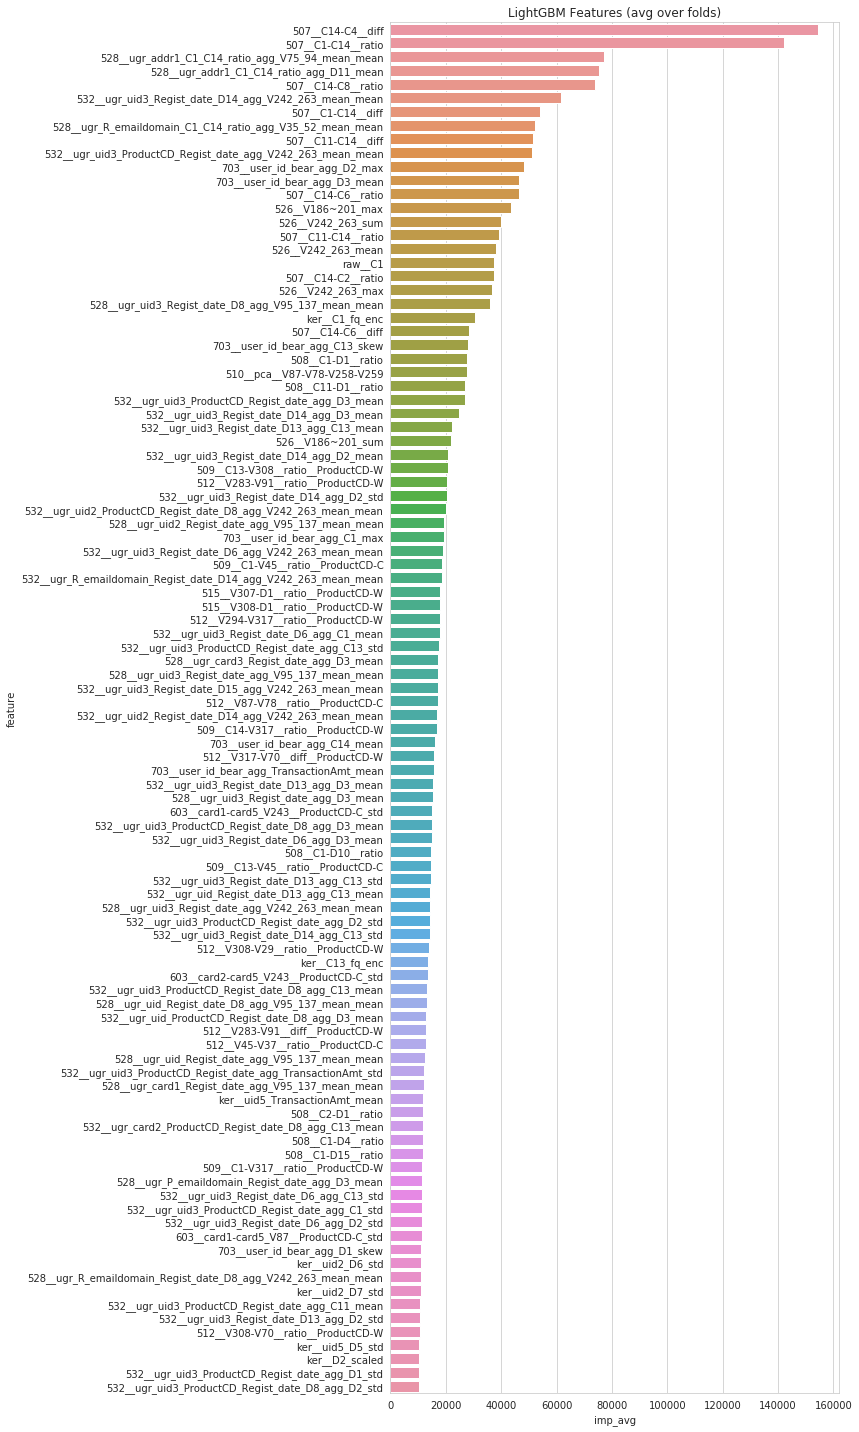

Setup Dataset dim_ml_dataset.


In [6]:
is_submit = [True, False][0]
has_dec = [True, False][0]
n_splits = 6
set_type = 'new_set'

valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

if len(valid_paths_train):
    df_feat_train = parallel_load_data(valid_paths_train)
    df_feat_test  = parallel_load_data(valid_paths_test)
    
    col_drops = eval_check_feature(df_feat_train, df_feat_test)
    
    tmp_train = df_train.join(df_feat_train)
    tmp_test = df_test.join(df_feat_test)
else:
    tmp_train = df_train
    tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# 2017-12抜いてみる
# if not has_dec:
#     tmp_train = tmp_train[tmp_train[COLUMN_GROUP]!='2017-12']
#     Y = Y.loc[tmp_train.index]
#     n_splits = 5


#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 60,
    'n_jobs': 96,
#     'n_jobs': 84,
#     'n_jobs': 48,
#     'n_jobs': 36,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.9,
    'subsample_freq': 1,
    'colsample_bytree' : 0.10,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
#     params['learning_rate'] = 0.05
    params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} {tmp_train.shape} lr {params['learning_rate']} ")

list_result_feim = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)
feim = list_result_feim[0]